# 2024 날씨 빅데이터 콘테스트 

## 전력 분야 - 기상에 따른 공동주택 전력수요 예측 개선 

In [25]:
import pandas as pd
import os 

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [12]:
df = pd.read_csv('./data/electric_train_cp949.csv', encoding='cp949', index_col=0)
df['electric_train.tm'] = pd.to_datetime(df['electric_train.tm'])

print(df.shape)

(7593355, 16)


In [34]:
elec_cols = ['electric_train.'+ a for a in ['tm', 'hh24', 'weekday', 'week_name', 'sum_qctr', 'n', 'sum_load', 'n_mean_load', 'elec']]
df_elec = df[elec_cols]
df_elec.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73


In [35]:
weat_cols = ['electric_train.'+ a for a in ['num', 'stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']]
df_weat = df[weat_cols]
df_weat.head()

,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,4821,884,2.2,62.7,1.8,0.0,-1.0
2,4821,884,2.3,63.1,2.1,0.0,-0.6
3,4821,884,2.2,62.4,2.5,0.0,-1.3
4,4821,884,1.7,63.5,1.7,0.0,-0.2
5,4821,884,1.7,63.0,1.6,0.0,-0.8


In [52]:
reset_order_cols = elec_cols + weat_cols

df_new = df[reset_order_cols]

df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


In [53]:
df_new['year'] = df_new['electric_train.tm'].dt.year
df_new['month'] = df_new['electric_train.tm'].dt.month
df_new['day'] = df_new['electric_train.tm'].dt.day

In [54]:
# 시즌을 결정하는 함수
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# 'season' 컬럼 추가
df_new['season'] = df_new['electric_train.tm'].dt.month.apply(get_season)

In [55]:
new_col_order = ['electric_train.tm', 'year', 'season', 'month','day','electric_train.hh24', 'electric_train.weekday',
       'electric_train.week_name', 'electric_train.sum_qctr',
       'electric_train.n', 'electric_train.sum_load',
       'electric_train.n_mean_load',
       'electric_train.num', 'electric_train.stn', 'electric_train.nph_ta',
       'electric_train.nph_hm', 'electric_train.nph_ws_10m',
       'electric_train.nph_rn_60m', 'electric_train.nph_ta_chi', 'electric_train.elec']

In [56]:
df_new = df_new[new_col_order]

In [57]:
df_new = df_new.sort_values(by='electric_train.tm')
df_new.head()

,electric_train.tm,year,season,month,day,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.elec
2647991,2020-01-01 01:00:00,2020,Winter,1,1,1,2,0,63850,39,9732.96,250.490543,13615,140,-8.5,74.5,0.9,0.0,-5.8,99.63
5208382,2020-01-01 01:00:00,2020,Winter,1,1,1,2,0,14750,20,2401.12,116.010234,18235,565,-8.8,25.6,1.9,0.0,-4.6,103.49
5182078,2020-01-01 01:00:00,2020,Winter,1,1,1,2,0,71630,32,12139.16,363.252769,18234,565,-8.8,25.6,1.9,0.0,-4.6,104.43
5155774,2020-01-01 01:00:00,2020,Winter,1,1,1,2,0,45840,28,6723.84,225.924357,18233,512,-6.3,31.3,2.5,0.0,-7.8,106.29
1280137,2020-01-01 01:00:00,2020,Winter,1,1,1,2,0,76450,44,12949.24,287.250770,11272,941,2.4,68.0,1.2,0.0,-5.3,102.45


In [42]:
aws_spots = sorted(df_new['electric_train.stn'].unique().tolist())
aws_spots[:10]

[98, 99, 101, 104, 106, 108, 112, 114, 119, 127]

In [43]:
print(len(aws_spots))

185


### AWS 기반으로 구역을 만들어도 되겠는데?

### 지역을 먼저 나눠보자 

In [44]:
df_0 = df_new[df_new['electric_train.stn']==aws_spots[0]]

df_0

,electric_train.tm,year,season,month,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.elec
7514444,2020-01-01 01:00:00,2020,Winter,1,1,2,0,32900,27,6546.60,225.444525,19878,98,1.5,21.0,3.9,0.0,-7.3,107.55
7514445,2020-01-01 02:00:00,2020,Winter,1,2,2,0,32900,27,6052.44,225.444525,19878,98,1.3,25.2,2.8,0.0,-7.0,99.43
7514446,2020-01-01 03:00:00,2020,Winter,1,3,2,0,32900,27,5485.12,225.444525,19878,98,1.2,25.8,4.5,0.0,-6.7,90.11
7514447,2020-01-01 04:00:00,2020,Winter,1,4,2,0,32900,27,5128.16,225.444525,19878,98,1.2,29.2,3.0,0.0,-6.4,84.25
7514448,2020-01-01 05:00:00,2020,Winter,1,5,2,0,32900,27,4943.68,225.444525,19878,98,1.2,31.0,2.9,0.0,-6.3,81.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540743,2022-12-31 20:00:00,2022,Winter,12,20,5,1,25550,21,6004.96,219.905353,19878,98,6.2,44.0,2.3,0.0,-1.1,130.03
7540744,2022-12-31 21:00:00,2022,Winter,12,21,5,1,25550,21,5975.84,219.905353,19878,98,5.7,45.1,1.5,0.0,-1.5,129.40
7540745,2022-12-31 22:00:00,2022,Winter,12,22,5,1,25550,21,5822.44,219.905353,19878,98,5.6,44.5,1.6,0.0,-1.3,126.08
7540746,2022-12-31 23:00:00,2022,Winter,12,23,5,1,25550,21,5599.16,219.905353,19878,98,5.3,43.0,2.0,0.0,-1.6,121.25


In [45]:
df_0_0am_day = df_0[(df_0['electric_train.tm'].dt.month == 1) & (df_0['electric_train.tm'].dt.day == 1) & (df_0['electric_train.tm'].dt.hour == 1)]

df_0_0am_day.head()

,electric_train.tm,year,season,month,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.elec
7514444,2020-01-01 01:00:00,2020,Winter,1,1,2,0,32900,27,6546.60,225.444525,19878,98,1.5,21.0,3.9,0.0,-7.3,107.55
7523228,2021-01-01 01:00:00,2021,Winter,1,1,4,0,25500,23,5425.36,208.450644,19878,98,0.5,53.3,2.9,0.0,-11.8,113.16
7531988,2022-01-01 01:00:00,2022,Winter,1,1,5,1,25550,21,5017.72,219.905353,19878,98,1.7,24.3,5.6,0.0,-12.3,108.66


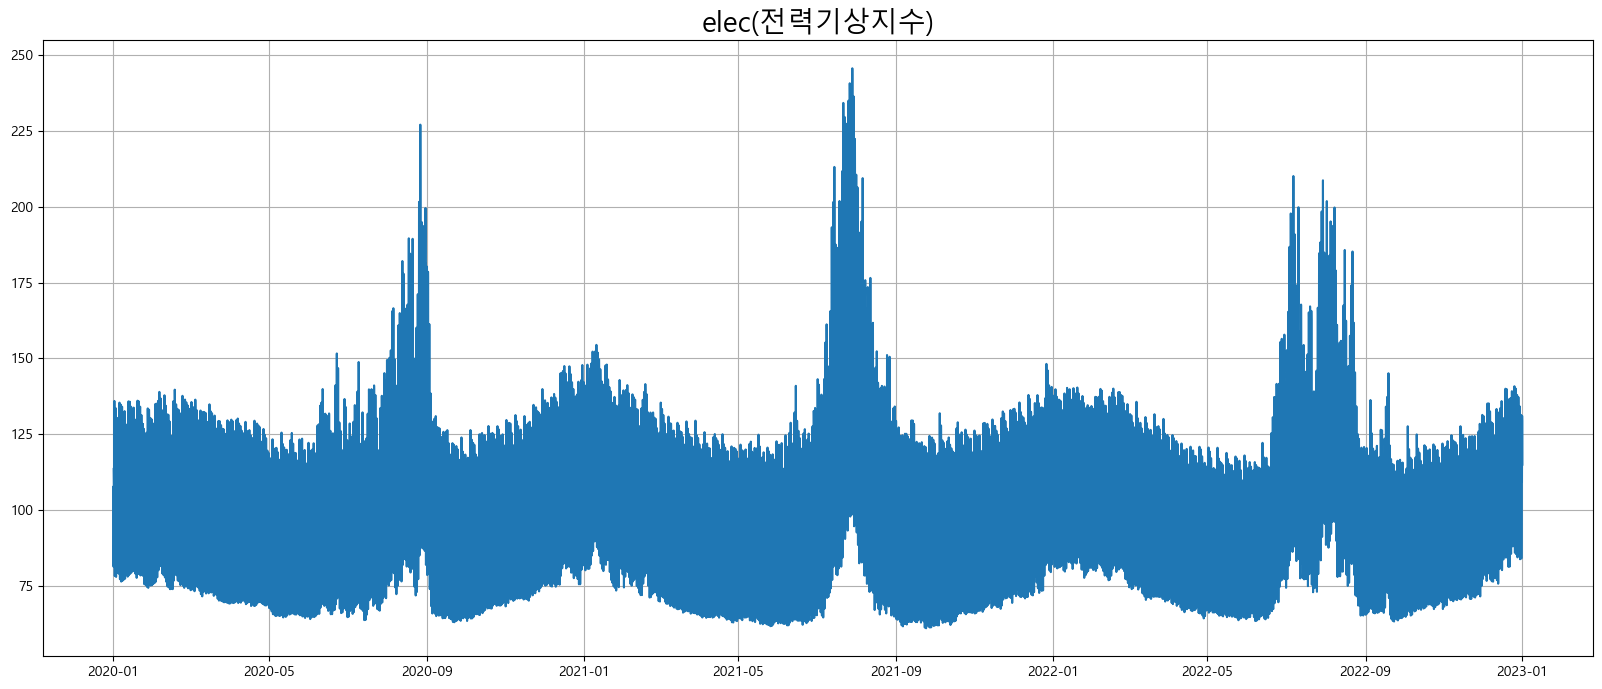

In [46]:

plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.elec', data = df_0)
plt.title('elec(전력기상지수)',fontsize=20)
plt.grid()

In [47]:
df_0 = df_new[df_new['electric_train.stn']==aws_spots[0]]

df_0

,electric_train.tm,year,season,month,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.elec
7514444,2020-01-01 01:00:00,2020,Winter,1,1,2,0,32900,27,6546.60,225.444525,19878,98,1.5,21.0,3.9,0.0,-7.3,107.55
7514445,2020-01-01 02:00:00,2020,Winter,1,2,2,0,32900,27,6052.44,225.444525,19878,98,1.3,25.2,2.8,0.0,-7.0,99.43
7514446,2020-01-01 03:00:00,2020,Winter,1,3,2,0,32900,27,5485.12,225.444525,19878,98,1.2,25.8,4.5,0.0,-6.7,90.11
7514447,2020-01-01 04:00:00,2020,Winter,1,4,2,0,32900,27,5128.16,225.444525,19878,98,1.2,29.2,3.0,0.0,-6.4,84.25
7514448,2020-01-01 05:00:00,2020,Winter,1,5,2,0,32900,27,4943.68,225.444525,19878,98,1.2,31.0,2.9,0.0,-6.3,81.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540743,2022-12-31 20:00:00,2022,Winter,12,20,5,1,25550,21,6004.96,219.905353,19878,98,6.2,44.0,2.3,0.0,-1.1,130.03
7540744,2022-12-31 21:00:00,2022,Winter,12,21,5,1,25550,21,5975.84,219.905353,19878,98,5.7,45.1,1.5,0.0,-1.5,129.40
7540745,2022-12-31 22:00:00,2022,Winter,12,22,5,1,25550,21,5822.44,219.905353,19878,98,5.6,44.5,1.6,0.0,-1.3,126.08
7540746,2022-12-31 23:00:00,2022,Winter,12,23,5,1,25550,21,5599.16,219.905353,19878,98,5.3,43.0,2.0,0.0,-1.6,121.25


In [48]:
df_new.loc[df_new['electric_train.stn'] == aws_spots[0], 'electric_train.elec'].values

array([107.55,  99.43,  90.11, ..., 126.08, 121.25, 114.88])

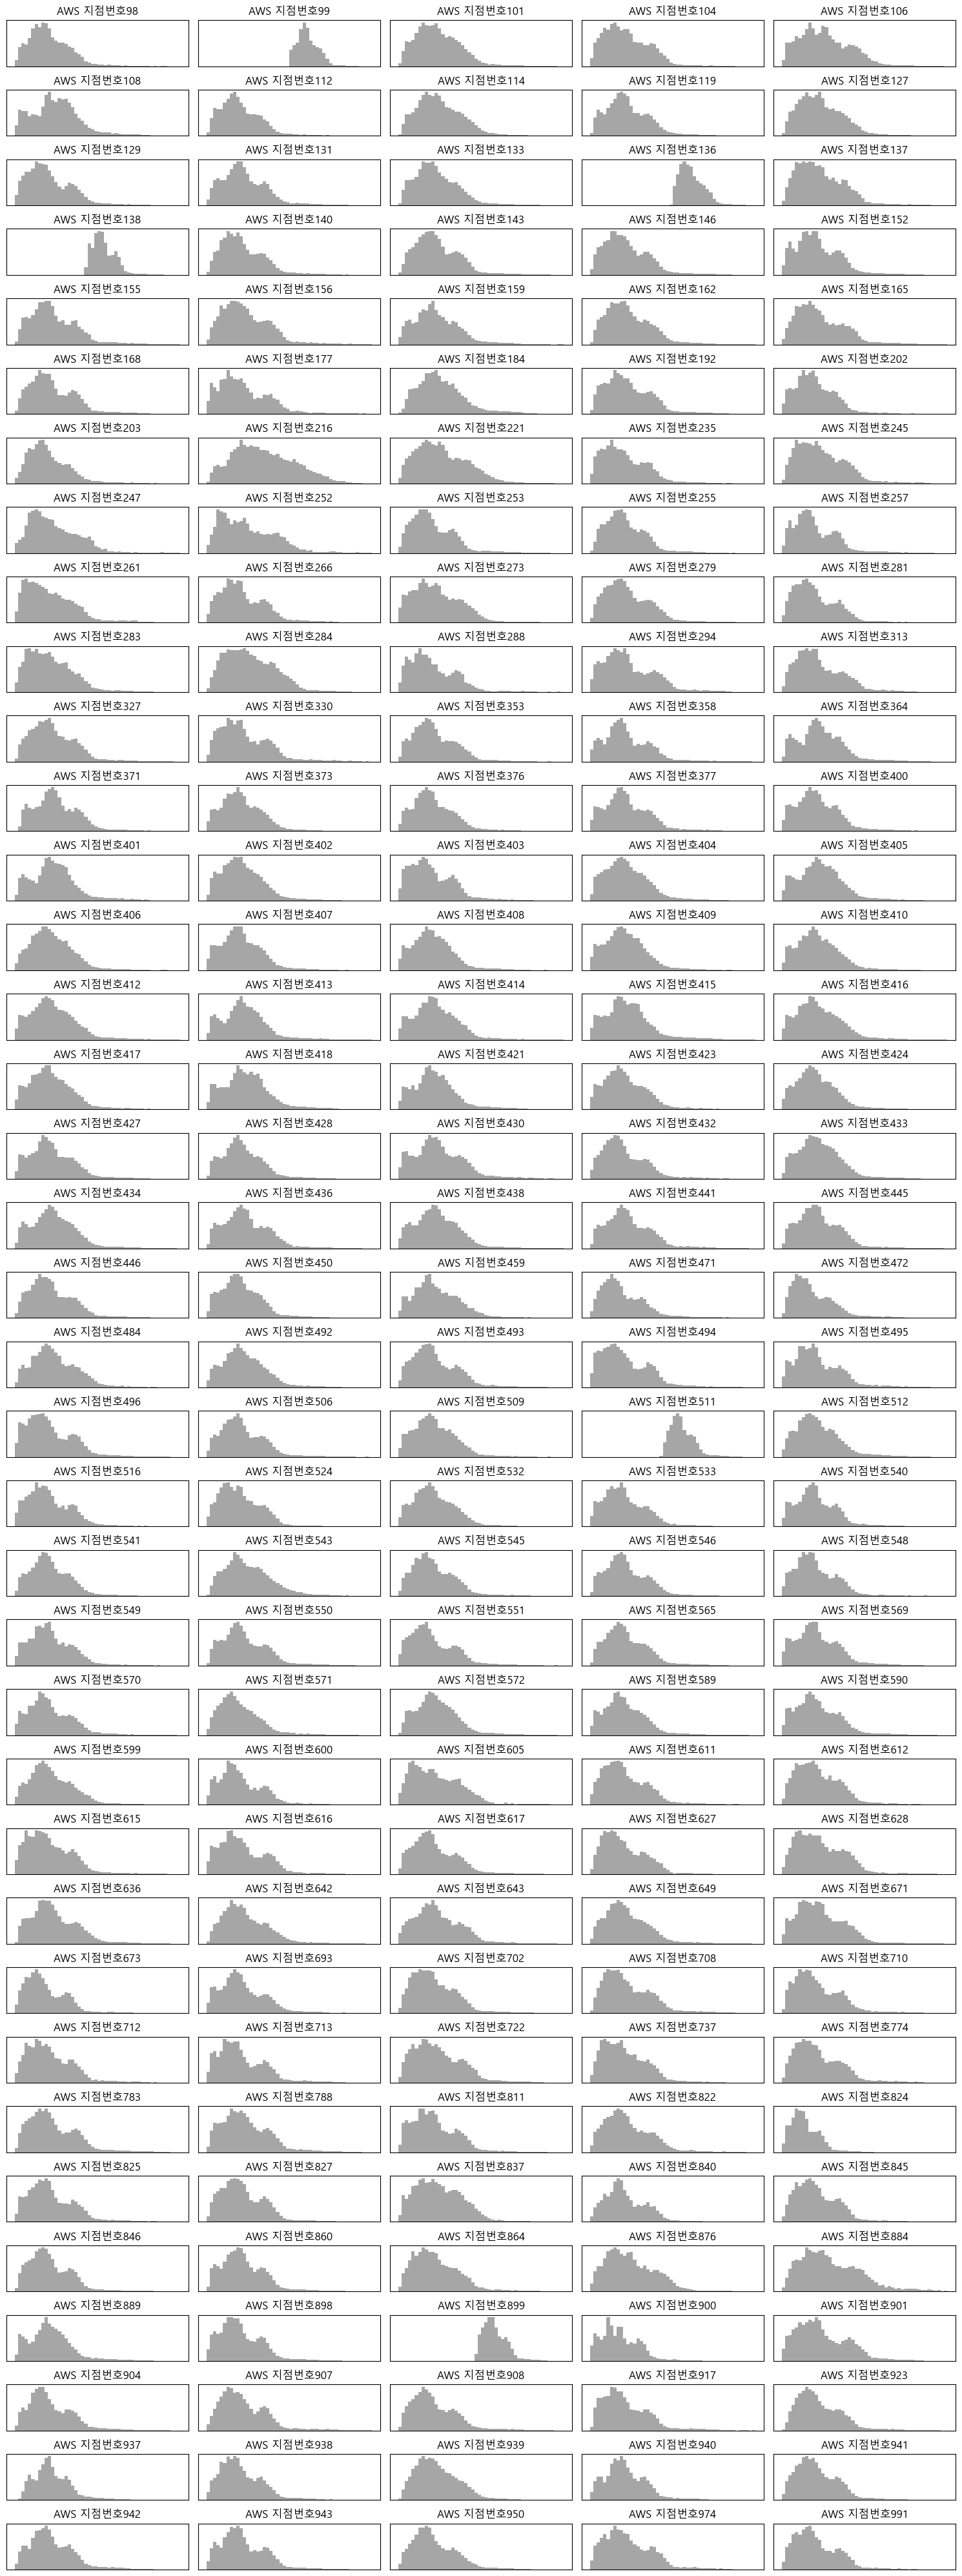

In [49]:
fig = plt.figure(figsize = (15, 40))
for num in range(len(aws_spots)):
    ax = plt.subplot(37, 5, 1+num)
    energy = df_new.loc[df_new['electric_train.stn'] == aws_spots[num], 'electric_train.elec'].values
    mean = energy.mean().round(3)           # 평균
    std = energy.std().round(3)             # 편차
    skew = (3*(mean - np.median(energy))/energy.std()).round(3) # 왜도

    # 왜도에 따라 
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
        
    plt.title(f'AWS 지점번호{aws_spots[num]}')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

In [51]:
k=0
df_0 = df_new[df_new['electric_train.stn']==aws_spots[k]]
df_0_0am_day = df_0[(df_0['electric_train.tm'].dt.month == 1) & (df_0['electric_train.tm'].dt.day == 1) & (df_0['electric_train.tm'].dt.hour == 1)]

df_0_0am_day.head()

,electric_train.tm,year,season,month,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.elec
7514444,2020-01-01 01:00:00,2020,Winter,1,1,2,0,32900,27,6546.60,225.444525,19878,98,1.5,21.0,3.9,0.0,-7.3,107.55
7523228,2021-01-01 01:00:00,2021,Winter,1,1,4,0,25500,23,5425.36,208.450644,19878,98,0.5,53.3,2.9,0.0,-11.8,113.16
7531988,2022-01-01 01:00:00,2022,Winter,1,1,5,1,25550,21,5017.72,219.905353,19878,98,1.7,24.3,5.6,0.0,-12.3,108.66
